### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

#**Exploratory Data Analysis (EDA)**

I am performing the Exploratory Data Analysis of the above stated problem: **Will the driver accept the coupon?** Below are the steps:

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [126]:
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

**1.** Read in the `coupons.csv` file.




##**Loading the data**

In [127]:
data = pd.read_csv('data/coupons.csv')

In [128]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

##**Cleaning the data**

In [129]:
data.shape

(12684, 26)

The provided dataset contains 12684 entries and 26 features.

Checking for duplicate entries.

In [130]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  74


Let's drop the duplicate entries.

In [131]:
#remove the duplicate rows
data = data.drop_duplicates()

Now there are only 12610 entries.

Below is the concise summary of the dataframe

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

The summary of the dataframe shows that there are null values in the entries. Let's get a clear picture of the null or NaN or missing values.

In [133]:
#returns the total number of missing values per column
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [134]:
#returns the percentage of each column's missing
data.isna().mean().multiply(100)

,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
time,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000


Below bar plot visualization shows a very clear picture of the percentatge of missing values.

<Axes: >

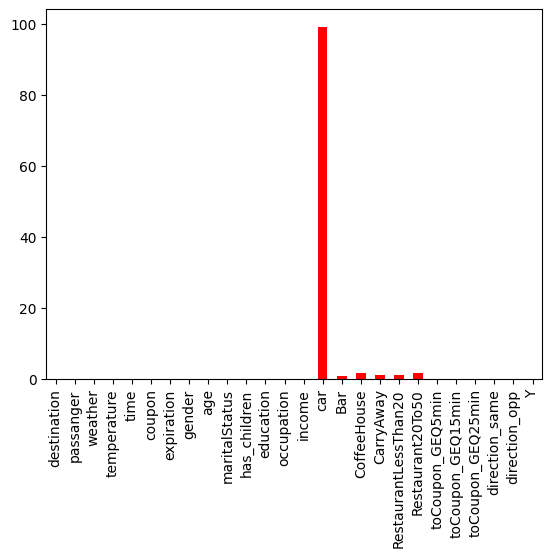

In [135]:
#plotting the missing value percentage
data.isna().mean().multiply(100).round(2).plot(kind = "bar", color='red')

**3.** Decide what to do about your missing data -- drop, replace, other...

Examining the number and percentage of missing values present in the data, the columns `car`, `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, `Restaurant20To50` contain missing values. <br>
The column `car` has **99%** values missing, which means that this feature was either optional to be filled in the survey or is not an important feature deciding the accceptance of the coupons. <br>
<br>
So, we can drop the column `car`


In [136]:
#drop the column 'car'
data = data.drop('car', axis=1)

In [137]:
data.shape

(12610, 25)

The columns `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, `Restaurant20To50` have very small number of missing values which could be imputed with their mode values, as they are all categorical columns.

In [138]:
data[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']].mode()

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,never,less1,1~3,1~3,less1


In [139]:
#filling in the missing values with corresponding mode value of the column
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])

Checking for missing values again.

In [140]:
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


There are no missing values now.

After further examination of `age` column, observed that the dataset treats the `age` as categorical feature. But as Age can be relevant feature for comparisons, a new column `age_numeric` could be created computing from `age` column itself.

In [141]:
data['age_numeric'] = data['age']
data.loc[data['age_numeric'] == '50plus', 'age_numeric'] = '51'
data.loc[data['age_numeric'] == 'below21', 'age_numeric'] = '20'
data['age_numeric'] = pd.to_numeric(data['age_numeric'])

##**Analyzing the data**

###**Univariate Analysis**

**4.** What proportion of the total observations chose to accept the coupon?



In [142]:
proportion_accepted = len(data[data.Y == 1]) / len(data['Y']) * 100
proportion_accepted

56.75654242664552

***Conclusion:***
Across the five different types of coupons - less expensive restaurents (under 20), coffee houses, carry out & take away, bar, and more expensive restaurents(20 - $50), **around 57% of the people accepted the coupons**.

A pie below chart better visualizes the proportion of coupon acceptance.


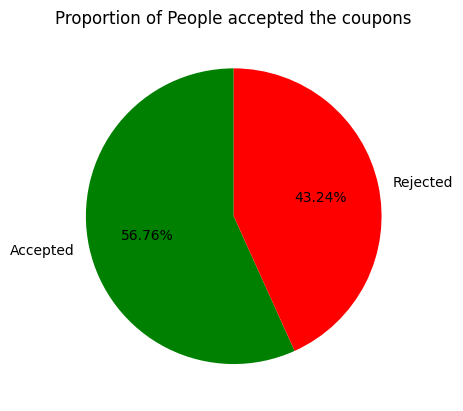

In [143]:
#returns the proportion of values 0 & 1 as a series
proportions = data['Y'].value_counts(normalize=True)

#renameing the index 1: Accepted, 0:Rejected, for readability
proportions = proportions.rename({0: 'Rejected', 1: 'Accepted'})

#plotting the proportion
proportions.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors = ['green','red'])
plt.title('Proportion of People accepted the coupons')
plt.ylabel('')
plt.show()

**5.** Use a bar plot to visualize the `coupon` column.

`coupon` is a categorical column that contains five different types of coupons. seaborn's countplot gives a count wise bar visualization.<br>
Bar plots of category wise coupon counts and category wise accepted/rejected coupon counts are included side by side for better visualization.

Text(0.5, 1.0, 'Distribution of Acceptance/Rejection of Coupons')

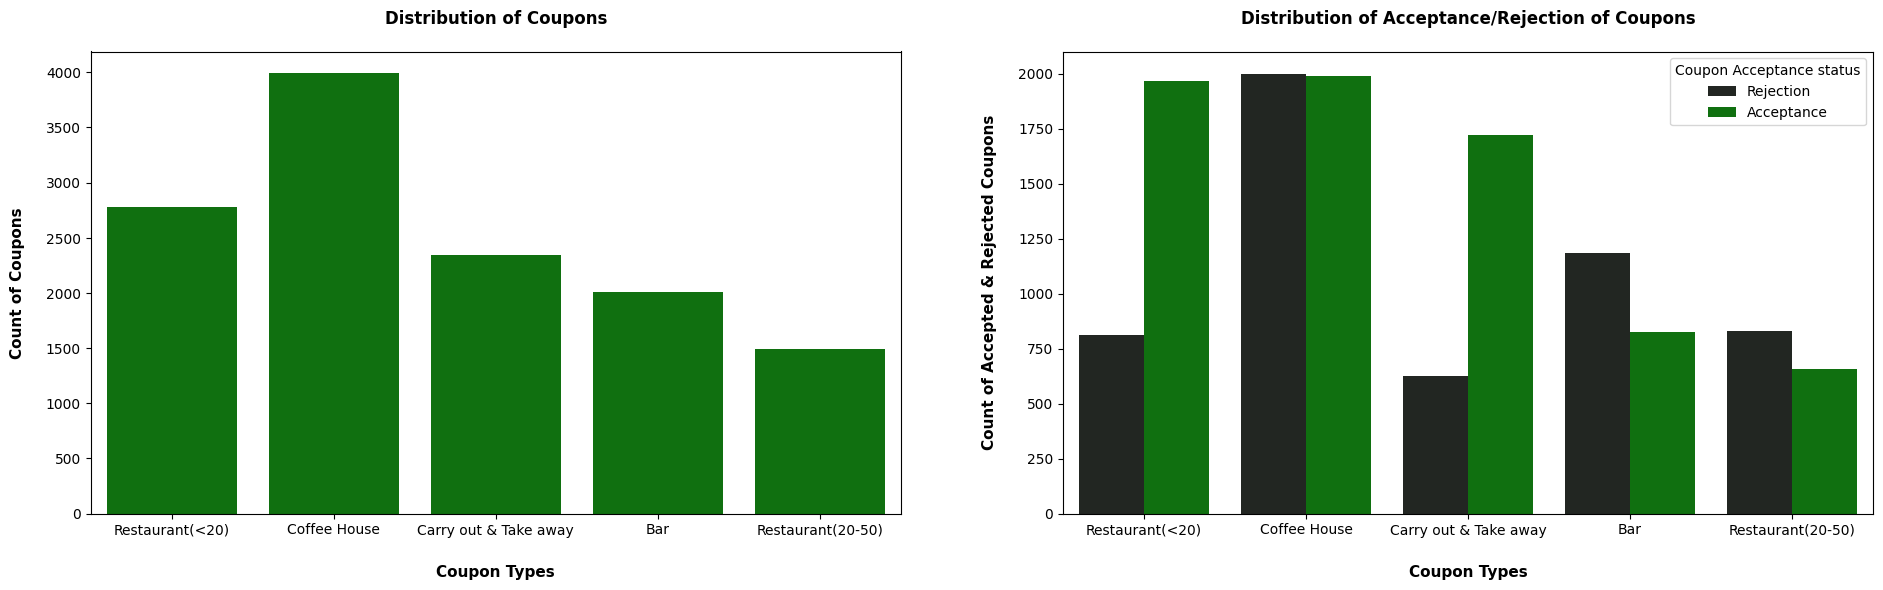

In [144]:
fig, axes = plt.subplots(1,2, figsize=(23, 6))
custom_labels = {'0': 'Rejection', '1': 'Acceptance'}
sns.countplot(x='coupon', data=data, color='green', ax=axes[0])
sns.countplot(x='coupon', hue = 'Y', data=data, color='green', ax=axes[1])
handles, labels = axes[1].get_legend_handles_labels()
new_labels = [custom_labels[label] for label in labels]
axes[1].legend(handles, new_labels, title='Coupon Acceptance status')
axes[0].set_xlabel('Coupon Types', labelpad=20, fontsize=11, fontweight='bold')
axes[0].set_ylabel('Count of Coupons', labelpad=15, fontsize=11, fontweight='bold')
axes[1].set_xlabel('Coupon Types', labelpad=20, fontsize=11, fontweight='bold')
axes[1].set_ylabel('Count of Accepted & Rejected Coupons', labelpad=15, fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Coupons', pad=20, fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Acceptance/Rejection of Coupons', pad=20, fontsize=12, fontweight='bold')

####**Findings:**<br>


*   Across the five different types of coupons - less expensive restaurents (under 20), coffee houses, carry out & take away, bar, and more expensive restaurents(20 - $50), around 57% of the people accepted the coupons.
*   Number of Coffee House coupons are distributed and accepted the highest. <br>
*   Number of More expensive Restaurent coupons are distributed the lowest. <br>
*   Coupon acceptance proportion is higher for less expensive restaurents and Carry out & Takeaway <br>
*   Coupon rejection proportion is higher for Bar and More expensive restaurents





**6**. Use a histogram to visualize the temperature column.

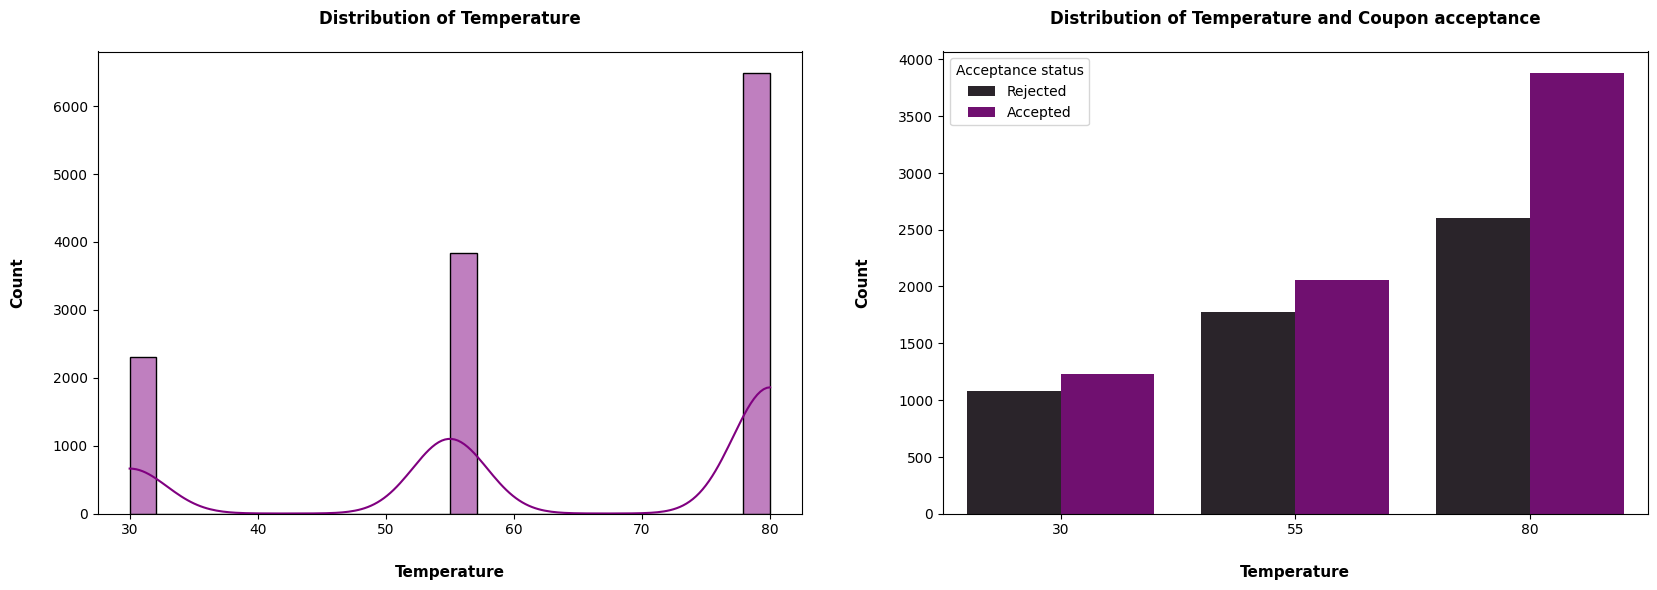

In [145]:
fig, axes = plt.subplots(1,2, figsize=(20, 6))
sns.histplot(data, x= 'temperature', color='purple', kde=True, ax=axes[0])
axes[0].set_xlabel('Temperature', labelpad=20, fontsize=11, fontweight='bold')
axes[0].set_ylabel('Count', labelpad=20, fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Temperature', pad=20, fontsize=12, fontweight='bold')

sns.countplot(data, x= 'temperature', color='purple', hue='Y', ax=axes[1])
axes[1].set_xlabel('Temperature', labelpad=20, fontsize=11, fontweight='bold')
axes[1].set_ylabel('Count', labelpad=20, fontsize=11, fontweight='bold')
axes[1].set_title('Distribution of Temperature and Coupon acceptance', pad=20, fontsize=12, fontweight='bold')
axes[1].legend(title="Acceptance status", labels=['Rejected', 'Accepted'])

###**Findings:**
1. More Coupons are delivered when temperature is higher
2. There is no clear pattern in the distribution of temperature across the data
3. Drivers are more likely to accept the coupons as temperature goes higher

### **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.

**Problem**: Will the customer accept a bar coupon? What are the impacts of other factors like the kind of passangers present in the car, number of times the driver usually visits a bar, age and occupation, matital sttaus of the driver etc in accepting or rejecting a coupon?

1. Create a new `DataFrame` that contains just the bar coupons.


In [146]:
databar = data[data['coupon'] == 'Bar']

**2.** What proportion of bar coupons were accepted?


In [147]:
proportion_bar_accepted = len(databar[databar.Y == 1]) / len(databar['Y']) * 100
proportion_bar_accepted

40.99502487562189

A pie below chart better visualizes the proportion of bar coupon acceptance.

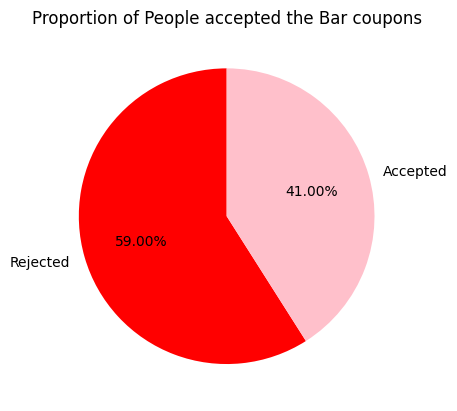

In [148]:
#returns the proportion of values 0 & 1 in the bar coupons as a series
bar_proportions = databar['Y'].value_counts(normalize=True)

#renameing the index 1: Accepted, 0:Rejected, for readability
bar_proportions = bar_proportions.rename({0: 'Rejected', 1: 'Accepted'})

#plotting the proportion
bar_proportions.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors = ['red','pink'])
plt.title('Proportion of People accepted the Bar coupons')
plt.ylabel('')
plt.show()

***Conclusion:*** Around **41%** of the Bar coupons were accepted.

### **Bivariate Analysis**

**3**. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [149]:
#Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

#list contains bar visits values 0, less than 1, 1 to 3
bar_visit_less = ['never','less1', '1~3']

#list contains bar visits values 4 to 8, greater than 8
bar_visit_more = ['4~8', 'gt8']

total_count = databar['Bar'].count()
less_visit = len(databar.query("Bar in @bar_visit_less and Y == 1"))
more_visit = len(databar.query("Bar in @bar_visit_more and Y == 1"))

less_visit_ratio = less_visit / total_count * 100
more_visit_ratio = more_visit / total_count * 100

print("Coupon Acceptance Rate of who those went to a bar 3 or fewer times/month: ", less_visit_ratio)
print("")
print("Coupon Acceptance Rate of who those went to a bar 4 or more times/month: ", more_visit_ratio)

Coupon Acceptance Rate of who those went to a bar 3 or fewer times/month:  33.38308457711443

Coupon Acceptance Rate of who those went to a bar 4 or more times/month:  7.611940298507462


***Conclusion:*** Coupon acceptance rate is higher for the category of drivers who went to the bar 3 or fewer times a month than who went more.

**4.** Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [150]:
#Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
bar_visits_more = ['1~3','4~8', 'gt8']
bar_visits_less = ['never','less1']
total_count = databar['Bar'].count()
#querying the dataframe for different conditions
databar_more_overage = len(databar.query("Bar in @bar_visits_more and age_numeric > 25"))
databar_more_underage = len(databar.query("Bar in @bar_visits_more and age_numeric < 25"))
databar_less_overage = len(databar.query("Bar in @bar_visits_less and age_numeric > 25"))
databar_less_underage = len(databar.query("Bar in @bar_visits_less and age_numeric < 25"))
#Calculating the ratio of different categories to the total
rate_more_overage = databar_more_overage / total_count * 100
rate_more_underage = databar_more_underage / total_count * 100
rate_less_overage = databar_less_overage / total_count * 100
rate_less_underage = databar_less_underage / total_count * 100

print("\nAcceptance Rate of drivers went to bar more than once a month and over the age 25: ", rate_more_overage)
print("\nAcceptance Rate of drivers went to bar more than once a month and under the age 25: ", rate_more_underage)
print("\nAcceptance Rate of drivers went to bar less than once a month and over the age 25: ", rate_less_overage)
print("\nAcceptance Rate of drivers went to bar less than once a month and under the age 25: ", rate_less_underage)


Acceptance Rate of drivers went to bar more than once a month and over the age 25:  20.8955223880597

Acceptance Rate of drivers went to bar more than once a month and under the age 25:  8.756218905472638

Acceptance Rate of drivers went to bar less than once a month and over the age 25:  54.02985074626866

Acceptance Rate of drivers went to bar less than once a month and under the age 25:  16.318407960199004


***Conclusion:***

*   Drivers who went to bar more than once a month are tend to accept the Bar coupons more when they are over the age of 25 than under age people


*   Drivers who went to bar less than once a month are tend to accept the Bar coupons more when they are over the age of 25 than under age people

*   Among the drivers who are over the age of 25, those who went to bar less than once a month are tend to accept the Bar coupons more than those who visited bar more





**5.** Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [151]:
#Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8bar_visits_more = ['1~3','4~8', 'gt8']
bar_visits_less = ['never','less1']
total_count = databar['Bar'].count()
#querying the dataframe for different conditions
databar_more_nokid = len(databar.query("Bar in @bar_visits_more and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'"))
databar_more_kid = len(databar.query("Bar in @bar_visits_more and passanger == 'Kid(s)' and occupation != 'Farming Fishing & Forestry'"))
databar_more_farm = len(databar.query("Bar in @bar_visits_more and passanger != 'Kid(s)' and occupation == 'Farming Fishing & Forestry'"))
databar_more_kidfarm = len(databar.query("Bar in @bar_visits_more and passanger == 'Kid(s)' and occupation == 'Farming Fishing & Forestry'"))
databar_less_nokid = len(databar.query("Bar in @bar_visits_less and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'"))
databar_less_kid = len(databar.query("Bar in @bar_visits_less and passanger == 'Kid(s)' and occupation != 'Farming Fishing & Forestry'"))
databar_less_farm = len(databar.query("Bar in @bar_visits_less and passanger != 'Kid(s)' and occupation == 'Farming Fishing & Forestry'"))
databar_less_kidfarm = len(databar.query("Bar in @bar_visits_less and passanger == 'Kid(s)' and occupation == 'Farming Fishing & Forestry'"))
#Calculating the ratio of different categories to the total
rate_databar_more_nokid = databar_more_nokid / total_count * 100
rate_databar_more_kid = databar_more_kid / total_count * 100
rate_databar_more_farm = databar_more_farm / total_count * 100
rate_databar_more_kidfarm = databar_more_kidfarm / total_count * 100
rate_databar_less_nokid = databar_less_nokid / total_count * 100
rate_databar_less_kid = databar_less_kid / total_count * 100
rate_databar_less_farm = databar_less_farm / total_count * 100
rate_databar_less_kidfarm = databar_less_kidfarm / total_count * 100

print("\nCoupon acceptance rate of drivers who go to bars more than once a month and had passengers \n that were not a kid and had occupations other than farming, fishing, or forestry: ", rate_databar_more_nokid)
print("\nCoupon acceptance rate of drivers who go to bars more than once a month and had passengers \n that were kids and had occupations other than farming, fishing, or forestry: ", rate_databar_more_kid)
print("\nCoupon acceptance rate of drivers who go to bars more than once a month and had passengers \n that were not a kid and had occupations in farming, fishing, or forestry: ", rate_databar_more_farm)
print("\nCoupon acceptance rate of drivers who go to bars more than once a month and had passengers \n that were kids and had occupations in farming, fishing, or forestry: ", rate_databar_more_kidfarm)
print("\nCoupon acceptance rate of drivers who go to bars less than once a month and had passengers \n that were not a kid and had occupations other than farming, fishing, or forestry: ", rate_databar_less_nokid)
print("\nCoupon acceptance rate of drivers who go to bars less than once a month and had passengers \n that were kids and had occupations other than farming, fishing, or forestry: ", rate_databar_less_kid)
print("\nCoupon acceptance rate of drivers who go to bars less than once a month and had passengers \n that were not a kid and had occupations in farming, fishing, or forestry: ", rate_databar_less_farm)
print("\nCoupon acceptance rate of drivers who go to bars less than once a month and had passengers \n that were kids and had occupations infarming, fishing, or forestry: ", rate_databar_less_kidfarm)


Coupon acceptance rate of drivers who go to bars more than once a month and had passengers 
 that were not a kid and had occupations other than farming, fishing, or forestry:  27.412935323383085

Coupon acceptance rate of drivers who go to bars more than once a month and had passengers 
 that were kids and had occupations other than farming, fishing, or forestry:  2.2388059701492535

Coupon acceptance rate of drivers who go to bars more than once a month and had passengers 
 that were not a kid and had occupations in farming, fishing, or forestry:  0.0

Coupon acceptance rate of drivers who go to bars more than once a month and had passengers 
 that were kids and had occupations in farming, fishing, or forestry:  0.0

Coupon acceptance rate of drivers who go to bars less than once a month and had passengers 
 that were not a kid and had occupations other than farming, fishing, or forestry:  62.13930348258706

Coupon acceptance rate of drivers who go to bars less than once a month and 

***Conclusions:***


*   Drivers who had occupations in farming, fishing, or forestry who go to bars more than once a month do not accept the coupons irrespective of them having kids as passengers.
*   Drivers who had occupations in farming, fishing, or forestry who go to bars less than once a month are very unlikely to accept the coupons irrespective of them having kids as passengers.
*   Among the drivers who had occupations other than farming, fishing, or forestry and had passengers that are kids, those who went to bars less than once a month are tend to accept the Bar coupons more than who visited bars more.
*   Among the drivers who had occupations other than farming, fishing, or forestry and had passengers that are not a kid, those who went to bars less than once a month are tend to accept the Bar coupons more than who visited bars more.





**6**. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [152]:
#Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
bar_visits_more = ['1~3','4~8', 'gt8']
total_bar_count = databar['Bar'].count()
#querying the dataframe for different conditions
databar_more_widow = len(databar.query("Bar in @bar_visits_more and passanger != 'Kid(s)' and maritalStatus == 'Widowed'"))
databar_more_nowidow = len(databar.query("Bar in @bar_visits_more and passanger != 'Kid(s)' and maritalStatus != 'Widowed'"))
databar_more_underage = len(databar.query("Bar in @bar_visits_more and age_numeric < 30"))
databar_more_overage = len(databar.query("Bar in @bar_visits_more and age_numeric > 30"))
#Calculating the ratio of different categories to the total
rate_databar_more_widow = databar_more_widow / total_bar_count * 100
rate_databar_more_nowidow = databar_more_nowidow / total_bar_count * 100
rate_databar_more_underage = databar_more_underage / total_bar_count * 100
rate_databar_more_overage = databar_more_overage / total_bar_count * 100

print("\nCoupon acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and were widowed: ", rate_databar_more_widow)
print("\nCoupon acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and were not widowed: ", rate_databar_more_nowidow)
print("\nCoupon acceptance rate of drivers who go to bars more than once and were under the age of 30: ", rate_databar_more_underage)
print("\nCoupon acceptance rate of drivers who go to bars more than once and were over the age of 30: ", rate_databar_more_overage)


Coupon acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and were widowed:  0.0

Coupon acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and were not widowed:  27.412935323383085

Coupon acceptance rate of drivers who go to bars more than once and were under the age of 30:  17.16417910447761

Coupon acceptance rate of drivers who go to bars more than once and were over the age of 30:  12.487562189054726


***Conclusions:***


*   Among the drivers who went to bars more than once a month and had passengers that were not a kid, those who were NOT widowed are tend to accept the Bar coupons more than who were widowed.
*  Drivers who went to bars more than once a month and had passengers that were not a kid and were widowed do not seem to accept the Bar coupons
*   Drivers who went to bars more than once a month are more likely to accept the Bar coupons when they are under the age of 30, than over 30







Comparison of those who go to cheap restaurants more than 4 times a month and income is less than 50K.

In [153]:
#Number of times that he/she eats at a restaurant with average expense less than \$20 per person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
cheapres_visits_more = ['4~8','gt8']
#Annual income: less than \$12500, \$12500 - \$24999, \$25000 - \$37499, etc.
income_range = '$37500 - $49999'
total_cheapres_count = data['RestaurantLessThan20'].count()
#querying the dataframe for different conditions
data_less_income_cheap = len(data.query("RestaurantLessThan20 in @cheapres_visits_more and income == '$37500 - $49999' "))
data_more_income_cheap = len(data.query("RestaurantLessThan20 in @cheapres_visits_more and income != '$37500 - $49999' "))
#Calculating the ratio of different categories to the total
rate_data_less_income_cheap = data_less_income_cheap / total_cheapres_count * 100
rate_data_more_income_cheap = data_more_income_cheap / total_cheapres_count * 100

print("\nCoupon acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: ", rate_data_less_income_cheap)
print("\nCoupon acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is more than 50K: ", rate_data_more_income_cheap)


Coupon acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:  5.202220459952419

Coupon acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is more than 50K:  33.14036478984932


***Conclusion:***
Drivers who who go to cheap restaurants more than 4 times a month are tend to accept cheap restaurent coupons if the annual income is more than 50K

**7**.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

A visualization of the behaviors of the bar coupon acceptance is shown below.

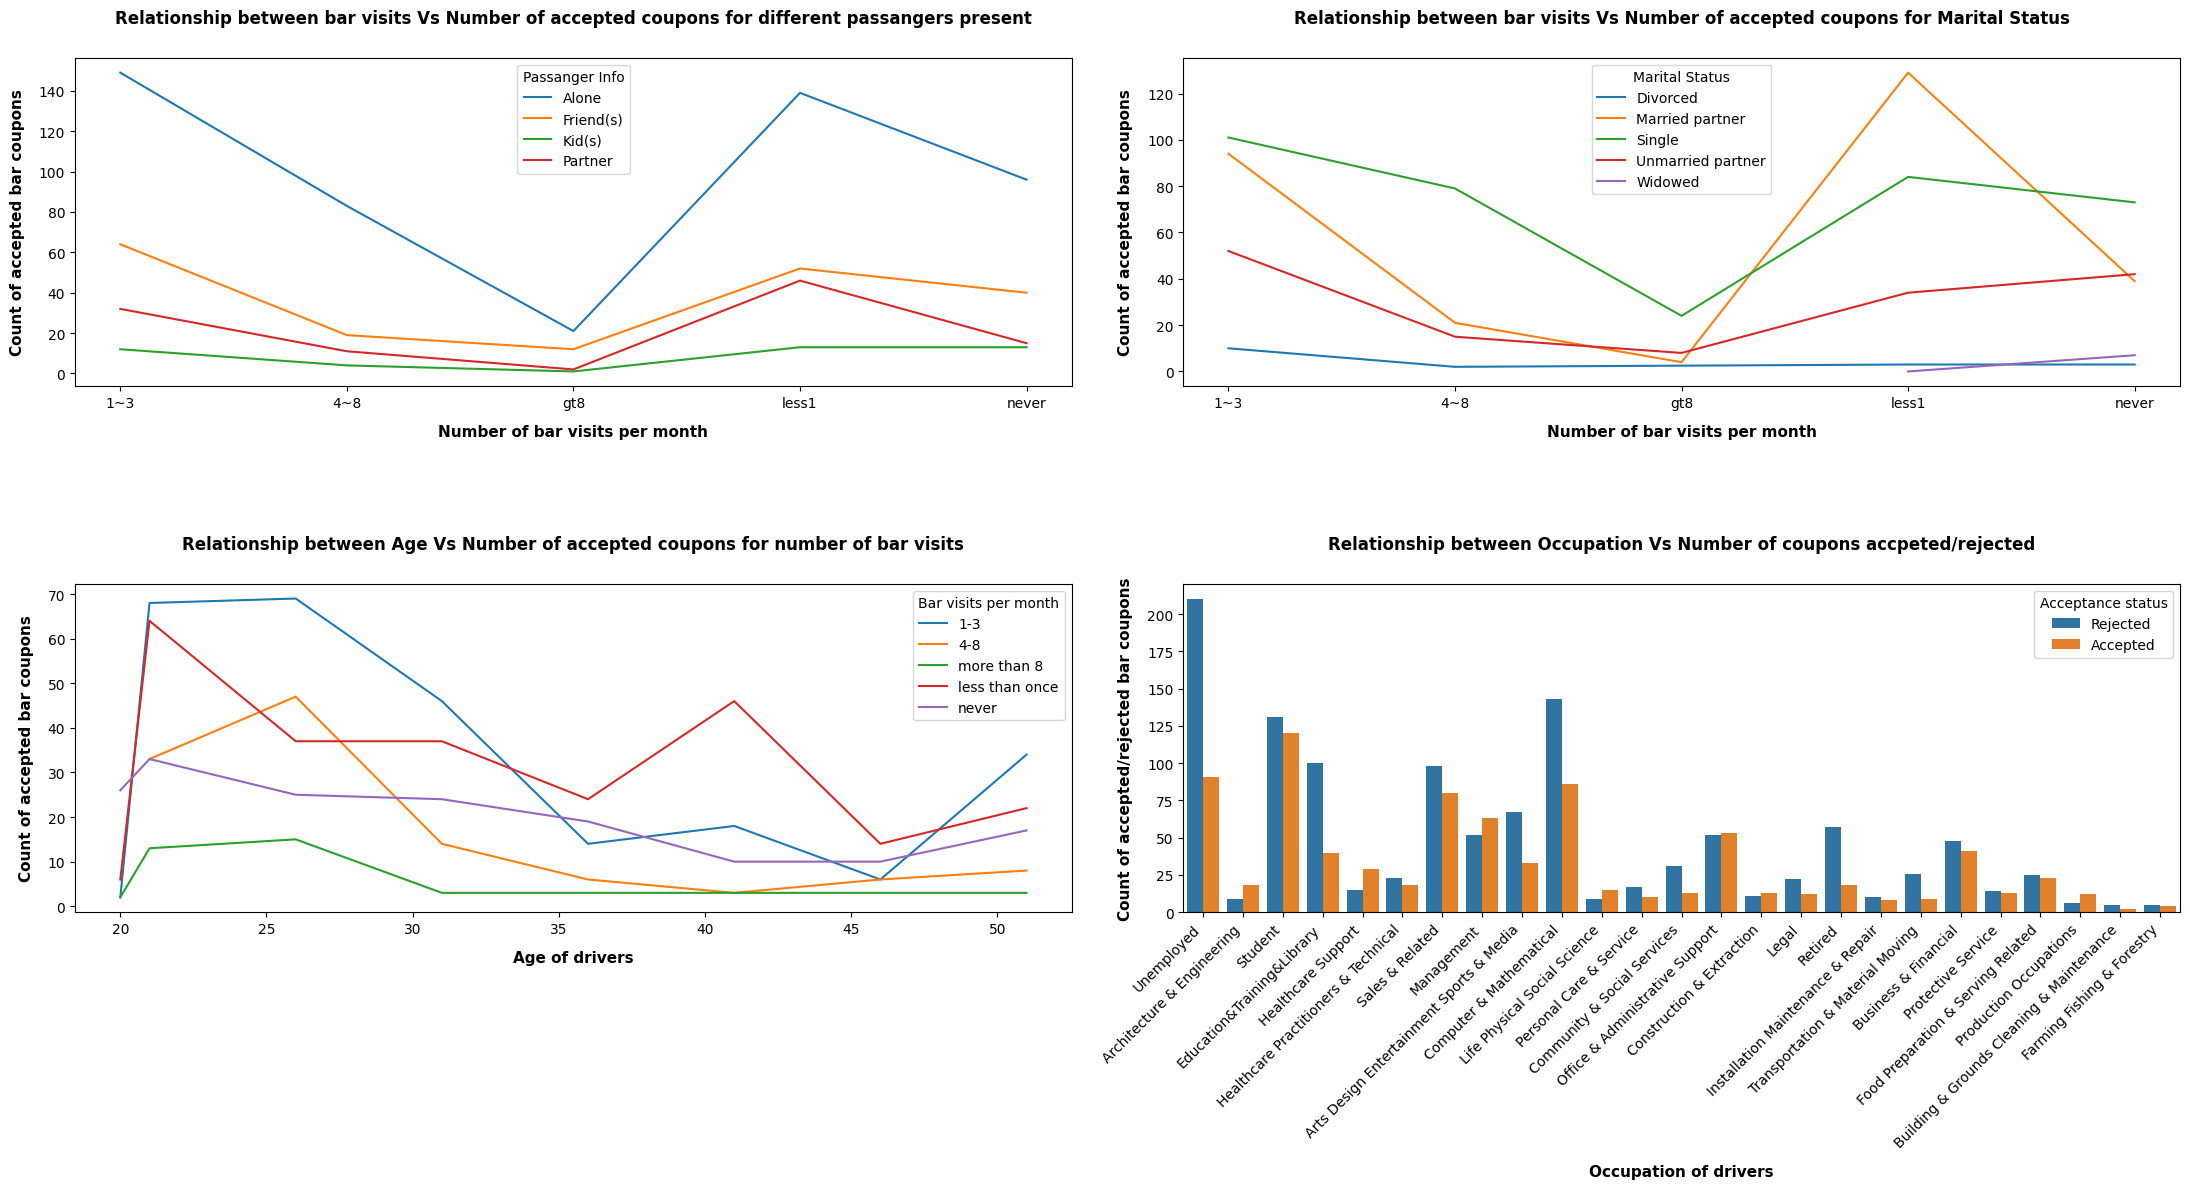

In [154]:
fig, axes = plt.subplots(2,2, figsize=(22, 12))
#line plot
data_bar_passanger = databar.groupby(["Bar","passanger"])[["Y"]].agg('sum').reset_index()
sns.lineplot(data_bar_passanger, x='Bar',y="Y", hue='passanger', ax=axes[0,0])
axes[0,0].set_xlabel('Number of bar visits per month',labelpad=10, fontsize=11, fontweight='bold')
axes[0,0].set_ylabel('Count of accepted bar coupons',labelpad=10, fontsize=11, fontweight='bold')
axes[0,0].set_title('Relationship between bar visits Vs Number of accepted coupons for different passangers present', pad=25, fontsize=12, fontweight='bold')
axes[0,0].legend(title="Passanger Info")
#line plot
data_bar_status = databar.groupby(["Bar","maritalStatus"])[["Y"]].agg('sum').reset_index()
sns.lineplot(data_bar_status, x='Bar',y="Y", hue='maritalStatus', ax=axes[0,1])
axes[0,1].set_xlabel('Number of bar visits per month',labelpad=10, fontsize=11, fontweight='bold' )
axes[0,1].set_ylabel('Count of accepted bar coupons',labelpad=10, fontsize=11, fontweight='bold')
axes[0,1].set_title('Relationship between bar visits Vs Number of accepted coupons for Marital Status', pad=25, fontsize=12, fontweight='bold')
axes[0,1].legend(title="Marital Status")
#line plot
data_bar_age = databar.groupby(["Bar","age_numeric"])[["Y"]].agg('sum').reset_index()
custom_labels = {'1~3': '1-3', '4~8': '4-8','gt8':'more than 8','less1':'less than once','never':'never'}
sns.lineplot(data_bar_age, x='age_numeric',y="Y", hue='Bar', ax=axes[1,0])
axes[1,0].set_xlabel('Age of drivers',labelpad=10, fontsize=11, fontweight='bold' )
axes[1,0].set_ylabel('Count of accepted bar coupons',labelpad=10, fontsize=11, fontweight='bold')
axes[1,0].set_title('Relationship between Age Vs Number of accepted coupons for number of bar visits', pad=25, fontsize=12, fontweight='bold')
handles, labels = axes[1,0].get_legend_handles_labels()
new_labels = [custom_labels[label] for label in labels]
axes[1,0].legend(handles, new_labels, title='Bar visits per month')
#bar plot
sns.countplot(databar, x='occupation', hue='Y', ax=axes[1,1])
axes[1,1].set_xlabel('Occupation of drivers',labelpad=10, fontsize=11, fontweight='bold' )
axes[1,1].set_ylabel('Count of accepted/rejected bar coupons',labelpad=10, fontsize=11, fontweight='bold')
axes[1,1].set_title('Relationship between Occupation Vs Number of coupons accpeted/rejected', pad=25, fontsize=12, fontweight='bold')
axes[1,1].legend(title="Acceptance status", labels=['Rejected', 'Accepted'])
#plot settings
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.subplots_adjust(hspace = 0.6)
plt.show()

Based on the analysis of Bar coupons, below are my findings:

### **Findings of Bar coupon ananlysis:**

1. Around 41% of the Bar coupons were accepted.
2. Coupon acceptance rate is higher for the category of drivers who went to the bar 3 or fewer times a month than who went more.
3. Drivers who went to bar more than once a month are tend to accept the Bar coupons more when they are over the age of 25 than under age people
4. Drivers who went to bar less than once a month are tend to accept the Bar coupons more when they are over the age of 25 than under age people
5. Among the drivers who are over the age of 25, those who went to bar less than once a month are tend to accept the Bar coupons more than those who visited bar more
6. Drivers who had occupations in farming, fishing, or forestry who go to bars more than once a month do not accept the coupons irrespective of them having kids as passengers.
7. Drivers who had occupations in farming, fishing, or forestry who go to bars less than once a month are very unlikely to accept the coupons irrespective of them having kids as passengers.
8. Among the drivers who had occupations other than farming, fishing, or forestry and had passengers that are kids, those who went to bars less than once a month are tend to accept the Bar coupons more than who visited bars more.
9. Among the drivers who had occupations other than farming, fishing, or forestry and had passengers that are not a kid, those who went to bars less than once a month are tend to accept the Bar coupons more than who visited bars more.
10. Among the drivers who went to bars more than once a month and had passengers that were not a kid, those who were NOT widowed are tend to accept the Bar coupons more than who were widowed.
11. Drivers who went to bars more than once a month and had passengers that were not a kid and were widowed do not seem to accept the Bar coupons
12. Drivers who went to bars more than once a month are more likely to accept the Bar coupons when they are under the age of 30, than over 30

**Actionable points:**


1.   Age is an important feature that affects the acceptance of bar coupon which is easy to track. So delivering bar coupons to appropriate age group will do good for the business
2.   Unemployed people has the highest rejectio rate. So, delivering the bar coupons based on a basic varification as employed or unemployed will be good for business.

**Hypothesis**: More than half of the drivers are likely to reject the bar coupons, in general.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### **Investigating Coffee House coupons**

**Problem**: Will the customer accept a Coffee House coupon? What are the deciding factors? Are the factors time of the day, direction of the coffee house, income, age, destination etc affects the acceptance? How can the analysis be utilized to boost the business?

Coffee House coupons are distributed the highest and the rejection ratio is also high. Let's find out the behaviour.

**1**. What proportion of Coffee House coupons were accepted?

Create a `Dataframe` which contains just the Coffee House coupons

In [155]:
datacoffee = data[data['coupon'] == 'Coffee House']

In [156]:
proportion_coffee_accepted = len(datacoffee[datacoffee.Y == 1]) / len(datacoffee['Y']) * 100
proportion_coffee_accepted

49.862120832288795

A pie chart below shows the proportion of the Coffee House coupon acceptance

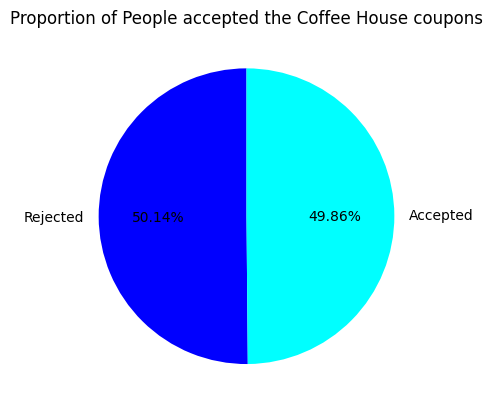

In [157]:
#returns the proportion of values 0 & 1 in the bar coupons as a series
coffee_proportions = datacoffee['Y'].value_counts(normalize=True)

#renameing the index 1: Accepted, 0:Rejected, for readability
coffee_proportions = coffee_proportions.rename({0: 'Rejected', 1: 'Accepted'})

#plotting the proportion
coffee_proportions.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors = ['blue','cyan'])
plt.title('Proportion of People accepted the Coffee House coupons')
plt.ylabel('')
plt.show()

***Conclusion:*** Around **50%** of the Coffee House coupons were accepted.

**2**. Find out the relationship between time of the day and coupon acceptance

Time of the day when the coupon was delivered can matter whether the driver decides to take a detour to the Coffee House or not. Let's find out.

Below statistics shows the proportion of acceptance and rejection for each category of Coffee House visits, at different time slots.

In [158]:
data_coffee_passanger = datacoffee.groupby(["CoffeeHouse","time"])[["Y"]].value_counts(normalize=True)
data_coffee_passanger

CoffeeHouse  time  Y
1~3          10AM  1    0.809955
                   0    0.190045
             10PM  1    0.542373
                   0    0.457627
             2PM   1    0.747826
                   0    0.252174
             6PM   1    0.556314
                   0    0.443686
             7AM   1    0.536170
                   0    0.463830
4~8          10AM  1    0.819672
                   0    0.180328
             10PM  1    0.604167
                   0    0.395833
             2PM   1    0.656566
                   0    0.343434
             6PM   1    0.648649
                   0    0.351351
             7AM   1    0.652893
                   0    0.347107
gt8          10AM  1    0.810811
                   0    0.189189
             10PM  0    0.735294
                   1    0.264706
             2PM   1    0.796875
                   0    0.203125
             6PM   1    0.581395
                   0    0.418605
             7AM   1    0.654762
                   0    0.345238
less1        10AM  1    0.667883
                   0    0.332117
             10PM  0    0.550562
                   1    0.449438
             2PM   1    0.502222
                   0    0.497778
             6PM   0    0.655629
                   1    0.344371
             7AM   0    0.574803
                   1    0.425197
never        10AM  0    0.743961
                   1    0.256039
             10PM  0    0.761194
                   1    0.238806
             2PM   0    0.811429
                   1    0.188571
             6PM   0    0.868726
                   1    0.131274
             7AM   0    0.821918
                   1    0.178082
Name: proportion, dtype: float64

Below is the visualization of relationship showing the Acceptance of Coffee house coupons at different time slots.

Text(0.5, 1.0, 'Relationship between Time Vs Coupon Acceptance for different Coffee House visit per month')

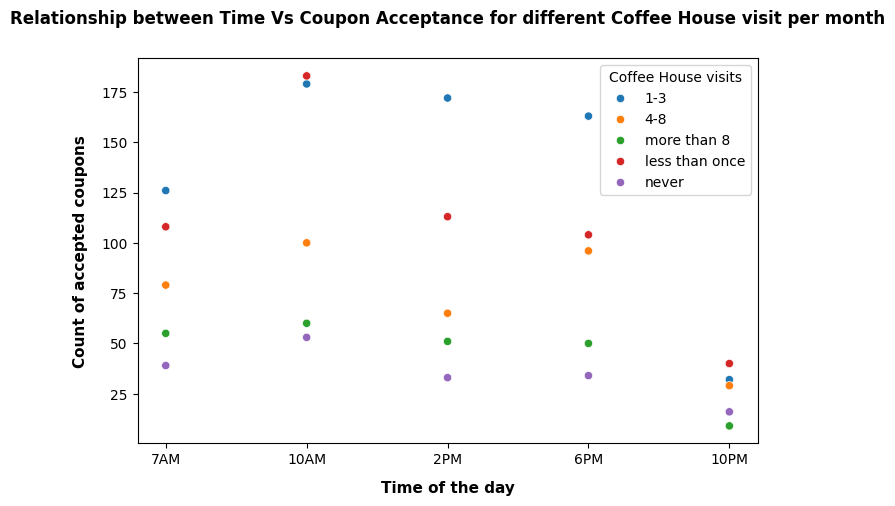

In [159]:
fig, axes = plt.subplots(figsize=(8, 5))
custom_labels = {'1~3': '1-3', '4~8': '4-8','gt8':'more than 8','less1':'less than once','never':'never'}
data_coffee_passanger = datacoffee.groupby(["CoffeeHouse","time"])[["Y"]].agg('sum').reset_index()
data_coffee_passanger['time'] = pd.Categorical(data_coffee_passanger['time'], categories=['7AM','10AM','2PM','6PM','10PM'], ordered=True)
axes = sns.scatterplot(data_coffee_passanger, x='time',y="Y",hue='CoffeeHouse')
data_coffee_passanger = datacoffee.groupby(["CoffeeHouse","time"])[["Y"]].agg('sum').reset_index()
handles, labels = axes.get_legend_handles_labels()
new_labels = [custom_labels[label] for label in labels]
axes.legend(handles, new_labels, title='Coffee House visits')

axes.set_xlabel('Time of the day',labelpad=10, fontsize=11, fontweight='bold')
axes.set_ylabel('Count of accepted coupons',labelpad=10, fontsize=11, fontweight='bold')
axes.set_title('Relationship between Time Vs Coupon Acceptance for different Coffee House visit per month',pad=25, fontsize=12, fontweight='bold')

***Conclusion:***



*   Starting from morning, the acceptance rate of Coffee House coupons increases.
*   During the morning hours around 10am is the highest number of Coffee House coupon acceptance rate.
*   In the Afternoon hours the acceptance rate slighly decreases.
*   At night around 10 pm the coupon acceptance is very low.
*   Among the people who go to a coffee house people who go 1 to 3 times a month has the highest rate of acceptance.
*   People who never visit coffee house has the lowest rate of acceptance.
*   People who visit more number of times a month has lower acceptance rate than who visits less.





**3**. Compare the relationship of age of the driver and who go to a Coffee House more than once a month, to those who go less than once a month.

Below, examining the distribution of age statistics, who accepts the coupon.

In [160]:
datacoffee.groupby('age')['Y'].value_counts(normalize=True)

age      Y
21       1    0.524349
         0    0.475651
26       1    0.514828
         0    0.485172
31       0    0.525806
         1    0.474194
36       0    0.532338
         1    0.467662
41       1    0.501538
         0    0.498462
46       1    0.509259
         0    0.490741
50plus   0    0.579817
         1    0.420183
below21  1    0.696774
         0    0.303226
Name: proportion, dtype: float64

Plotting the relationship of age and acceptance of coffee house coupons.

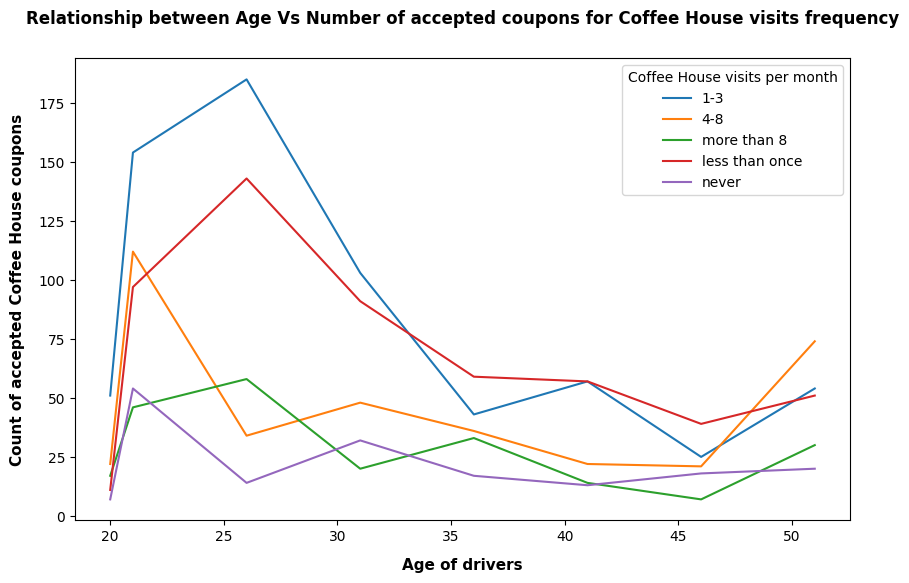

In [161]:
fig, axes = plt.subplots(figsize=(10, 6))
data_coffee_age = datacoffee.groupby(["CoffeeHouse","age_numeric"])[["Y"]].agg('sum').reset_index()
custom_labels = {'1~3': '1-3', '4~8': '4-8','gt8':'more than 8','less1':'less than once','never':'never'}
axes = sns.lineplot(data_coffee_age, x='age_numeric',y="Y", hue='CoffeeHouse')
axes.set_xlabel('Age of drivers',labelpad=10, fontsize=11, fontweight='bold' )
axes.set_ylabel('Count of accepted Coffee House coupons',labelpad=10, fontsize=11, fontweight='bold')
axes.set_title('Relationship between Age Vs Number of accepted coupons for Coffee House visits frequency', pad=25, fontsize=12, fontweight='bold')
handles, labels = axes.get_legend_handles_labels()
new_labels = [custom_labels[label] for label in labels]
axes.legend(handles, new_labels, title='Coffee House visits per month')


***Conclusion:***


*   Drivers in the age range below 21 has the highest rate of acceptance of Coffee House coupons
*   Drivers in the age rage 30 and 35 are tend to reject the coupons.
*   Acceptance ratio decreases with as age increases.
*   Among all age groups, people who went to coffee house 1-3 times a month are tend to accept the coupon.
*  Among all age groups, people who never went to coffee house in a month are tend to reject the coupon.








**4**. Compare the acceptance rate between those who go to Coffee House more than once a month and the destination is No Urgent Place, to all others

The destination of the driver can have high impact on deciding whether one would accept or reject the coupon.

Below bar plot clearly shows the acceptance rate of the coupons depending on the driver's destination

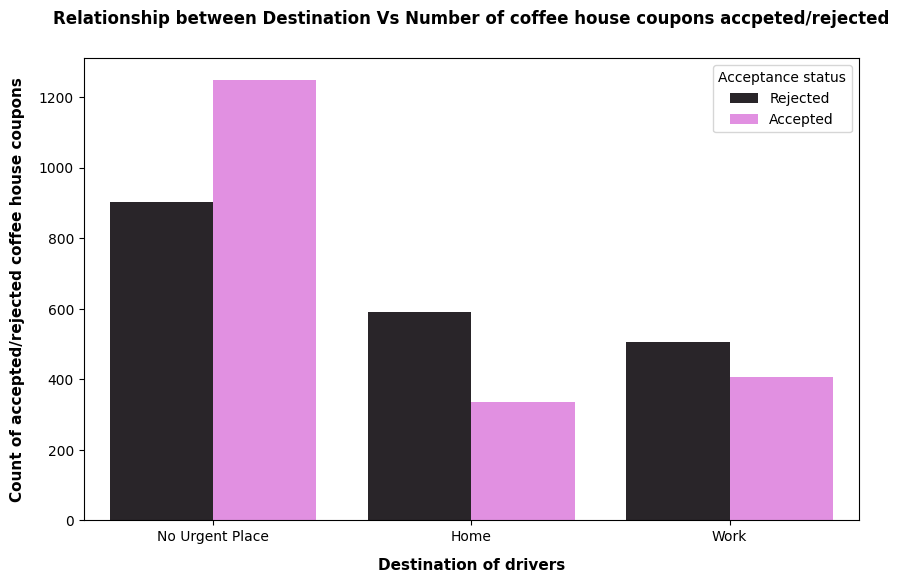

In [162]:
fig, axes = plt.subplots(figsize=(10, 6))
axes = sns.countplot(datacoffee, x='destination', hue='Y', color='violet')
axes.set_xlabel('Destination of drivers',labelpad=10, fontsize=11, fontweight='bold' )
axes.set_ylabel('Count of accepted/rejected coffee house coupons',labelpad=10, fontsize=11, fontweight='bold')
axes.set_title('Relationship between Destination Vs Number of coffee house coupons accpeted/rejected', pad=25, fontsize=12, fontweight='bold')
axes.legend(title="Acceptance status", labels=['Rejected', 'Accepted'])


***Conclusion:***


*   Drivers whose destination is No Urgent Place are tend to accept the coupons.
*   Drivers who are going home or work are tend to reject the coupons.



**5**. Find out the correlation between numberical features in the Coupon Acceptance rate

Finding out if there any correlation between the numerical features of the dataset in deciding the acceptance rate.

In [163]:
data_correlation = datacoffee[['temperature','age_numeric','direction_same','direction_opp','Y']]
data_correlation.describe()

,temperature,age_numeric,direction_same,direction_opp,Y
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000
mean,68.035849,32.165706,0.187766,0.812234,0.498621
std,15.980067,10.406235,0.390574,0.390574,0.500061
min,30.000000,20.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,0.000000,1.000000,0.000000
50%,80.000000,31.000000,0.000000,1.000000,0.000000
75%,80.000000,41.000000,0.000000,1.000000,1.000000
max,80.000000,51.000000,1.000000,1.000000,1.000000


Visualizing the correlation using a heatmap. The features considered are `temperature`, `age_numeric`, `direction_same`, `direction_opp`, `Y`

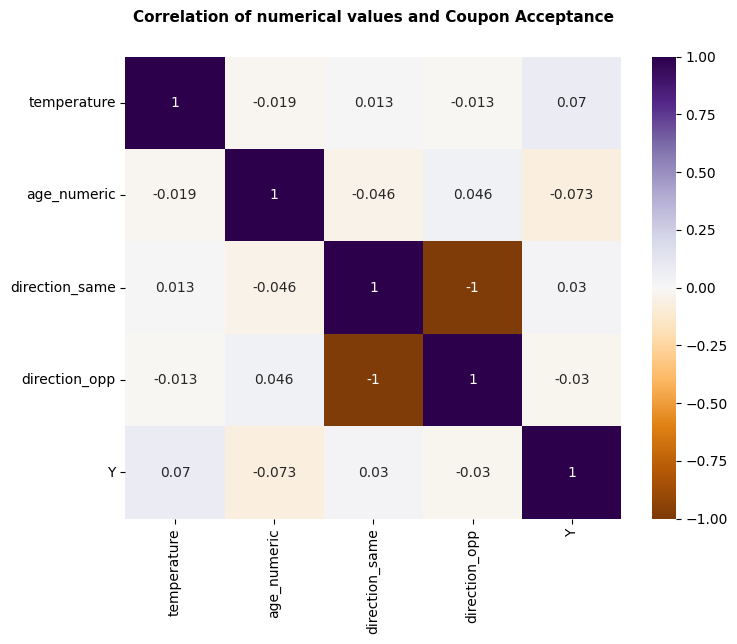

In [164]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_correlation.corr(), annot=True, cmap='PuOr', vmin=-1, vmax=1)
plt.title('Correlation of numerical values and Coupon Acceptance', pad=25, fontsize=11, fontweight='bold')
plt.show()

Also, a paiplot of the correlation indices.

Text(0.5, 1.05, 'Correlation of numerical values and Coupon Acceptance')

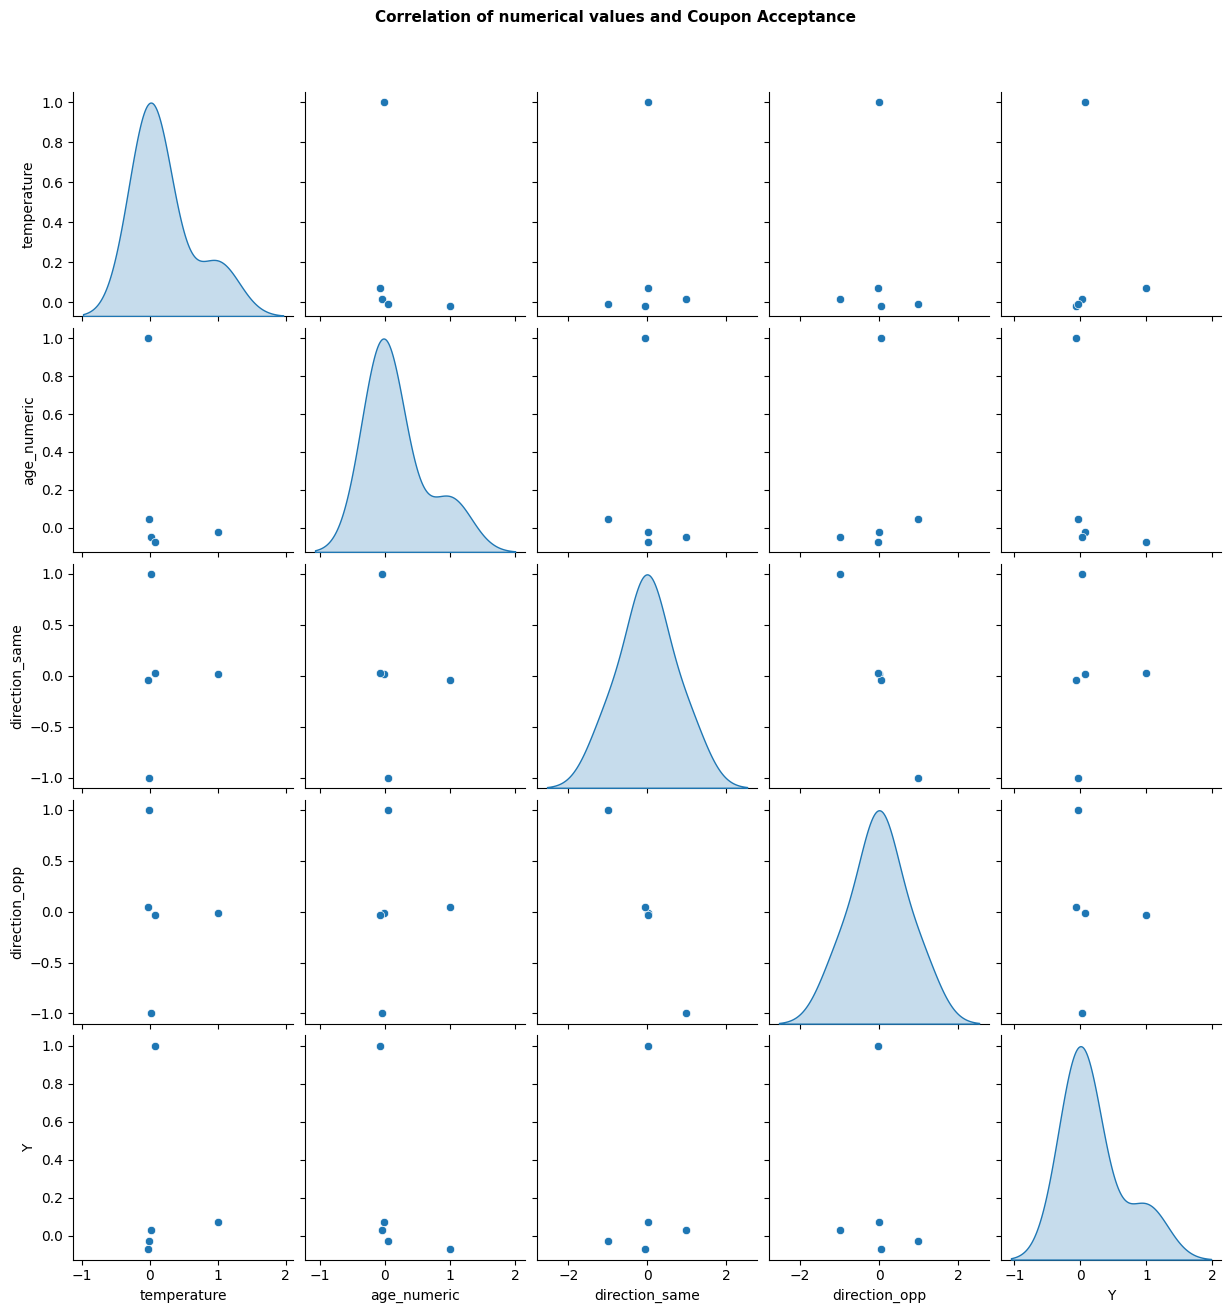

In [165]:
ax = sns.pairplot(data_correlation.corr(), diag_kind="kde")
ax.fig.suptitle('Correlation of numerical values and Coupon Acceptance', fontsize=11, fontweight='bold',y=1.05)

***Conclusion:***


*   There is no good correlation exists between the numerical features in deciding the Coffee House Coupon Acceptance
*   A very weak positive correlation is seen between temperature and Acceptance
*   A very weak negative correlation is seen between age and Acceptance






Based on the analysis of Coffee House coupons, below are my findings:

## **Findings of Coffee House Coupons**
1. Around 50% of the Coffee House coupons were accepted.
2. Starting from morning, the acceptance rate of Coffee House coupons increases.
3. During the morning hours around 10am is the highest number of Coffee House coupon acceptance rate.
4. In the Afternoon hours the acceptance rate slighly decreases.
5. At night around 10 pm the coupon acceptance is very low.
6. Among the people who go to a coffee house people who go 1 to 3 times a month has the highest rate of acceptance.
7. People who never visit coffee house has the lowest rate of acceptance.
8. People who visit more number of times a month has lower acceptance rate than who visits less.
9. Drivers in the age range below 21 has the highest rate of acceptance of Coffee House coupons
10. Drivers in the age rage 30 and 35 are tend to reject the coupons.
11. Acceptance ratio decreases with as age increases.
12. Among all age groups, people who went to coffee house 1-3 times a month are tend to accept the coupon.
13. Among all age groups, people who never went to coffee house in a month are tend to reject the coupon.
14. Drivers whose destination is No Urgent Place are tend to accept the coupons.
15. Drivers who are going home or work are tend to reject the coupons.
16. There is no good correlation exists between the numerical features in deciding the Coffee House Coupon Acceptance
17. A very weak positive correlation is seen between temperature and Acceptance
18. A very weak negative correlation is seen between age and Acceptance

**Actionable points:**

1. Destination of a driver is an important factor that affects the coupon acceptance rate. So delivering coffee house coupons based on the possible destination can do good for business.
2. Delivering the coupon, based on the time of the day can be good for business as time as a good impoact in acceptance rate.

**Hypothesis:** About equal chances are there for the drivers to accept or reject a coffee house coupon, in general.
